In [46]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [47]:
df = pd.read_csv('mortality_prediction_dataset.csv')
df.head()


,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Mortality_Status
0,1.574258,0,0,0,0,1,3,1,-1.508826,1,1,1.540617,-0.777956,0
1,-0.445222,0,1,1,2,0,2,1,0.634794,1,1,0.135463,1.430524,0
2,0.452325,0,2,2,4,0,2,1,2.570968,1,1,0.135463,2.534764,0
3,0.452325,0,0,0,0,1,3,1,-0.540740,1,1,-1.550721,-0.777956,0
4,-0.781802,0,1,0,1,1,3,1,1.049689,1,1,-1.410206,-0.777956,0


In [48]:
fig = px.scatter(df,x='Age',y='Mortality_Status',color='Mortality_Status',title='Age vs Tumor Size',width=800,height=600)

fig.show()

In [49]:
x =df.drop(['Mortality_Status'], axis=1)
y = df['Mortality_Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [50]:
from sklearn.naive_bayes import GaussianNB

In [51]:
gmb= GaussianNB()
gmb.fit(x_train, y_train)
y_pred = gmb.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8341013824884793
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       582
           1       0.25      0.29      0.27        69

    accuracy                           0.83       651
   macro avg       0.58      0.59      0.59       651
weighted avg       0.84      0.83      0.84       651

Confusion Matrix:
 [[523  59]
 [ 49  20]]


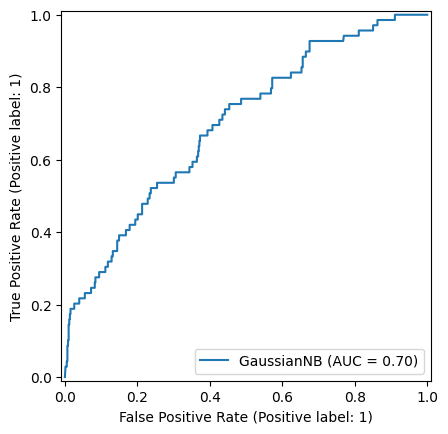

In [52]:
from sklearn.metrics import RocCurveDisplay
gmb_disp = RocCurveDisplay.from_estimator(gmb, x_test, y_test)

In [53]:
from sklearn.model_selection import GridSearchCV

Building a k-Nearest-Neighbours (kNN) Model 

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [56]:
y_pred = knn.predict(x_test)

In [57]:
#Evaluate the kNN model’s test results
print("Classification Report of  model:\n", classification_report(y_test, y_pred))
print("Confusion Matrix of  model:\n", confusion_matrix(y_test, y_pred))

Classification Report of  model:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       582
           1       0.28      0.10      0.15        69

    accuracy                           0.88       651
   macro avg       0.59      0.54      0.54       651
weighted avg       0.84      0.88      0.85       651

Confusion Matrix of  model:
 [[564  18]
 [ 62   7]]


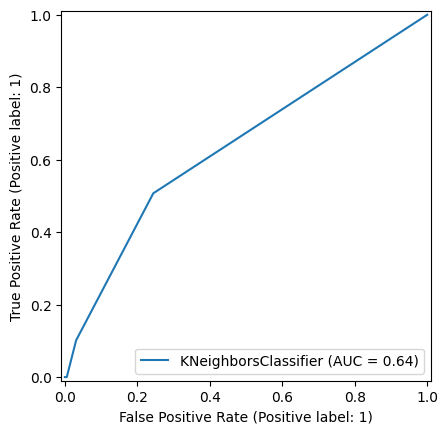

In [58]:
gnn_disp = RocCurveDisplay.from_estimator(knn, x_test, y_test)

Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [77]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)



Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       582
           1       0.33      0.01      0.03        69

    accuracy                           0.89       651
   macro avg       0.61      0.51      0.49       651
weighted avg       0.84      0.89      0.85       651

[[580   2]
 [ 68   1]]


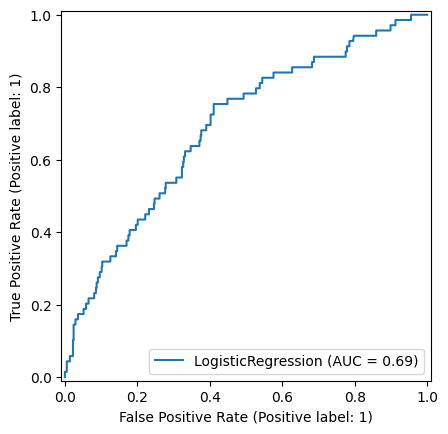

In [82]:
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

lr_disp = RocCurveDisplay.from_estimator(lr, x_test, y_test)

Best parameters found:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy of best model: 0.8924731182795699
Classification Report of best model:
               precision    recall  f1-score   support

           0       0.90      1.00      0.94       582
           1       0.33      0.01      0.03        69

    accuracy                           0.89       651
   macro avg       0.61      0.51      0.49       651
weighted avg       0.84      0.89      0.85       651

Confusion Matrix of best model:
 [[580   2]
 [ 68   1]]


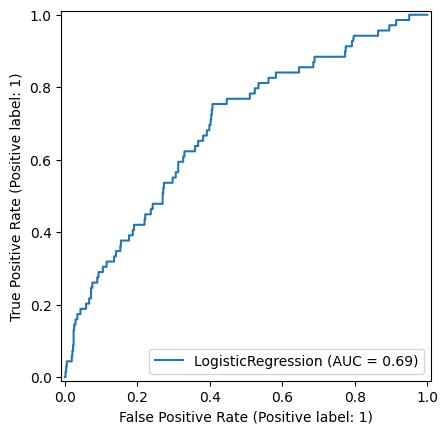

In [83]:
#parameter grid Define
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear']  # Solvers that support l1 penalty
}
lr1 = LogisticRegression(
    max_iter=10000,  # Increase max_iter for convergence
    random_state=42,
)
lr_gsvc = GridSearchCV(lr1, param_grid, cv=5, scoring='roc_auc')
lr_gsvc.fit(x_train, y_train)
# check top performing parameters
print("Best parameters found: ", lr_gsvc.best_params_)
best_lr = lr_gsvc.best_estimator_
# Predict using the best model
y_best_pred_lr = best_lr.predict(x_test)
# Evaluate the best model
print("Accuracy of best model:", accuracy_score(y_test, y_best_pred_lr))
print("Classification Report of best model:\n", classification_report(y_test, y_best_pred_lr,zero_division=1))
print("Confusion Matrix of best model:\n", confusion_matrix(y_test, y_best_pred_lr))
lr_disp = RocCurveDisplay.from_estimator(best_lr, x_test, y_test)